In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn
from torch.nn.functional import relu
from scipy.io import loadmat
import os
from os import listdir
import pandas as pd
from skimage import io
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sn

from utils import *

In [11]:

train_loader, val_loader, test_loader = create_dataloaders(batch_size=128, version='_Goose_5sW')#, upsample=True)

In [3]:
len(train_loader), len(val_loader), len(test_loader)

(111, 4, 30)

In [4]:
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader): # check shapes
    print(data.shape)
    print(label.shape)
    print(len(date))
    print(len(rec))
    print(len(time))
    break

torch.Size([128, 62, 100, 5])
torch.Size([128, 1])
128
128
128


date:180327, rec:001, time:1377.0


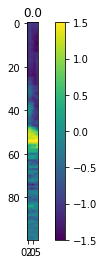

date:180325, rec:009, time:12.0


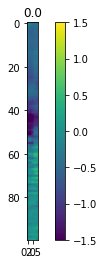

date:180323, rec:003, time:1522.0


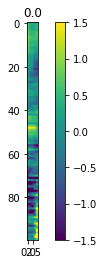

date:180324, rec:009, time:1617.0


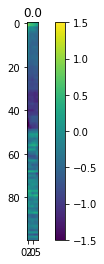

date:180414, rec:007, time:1080.0


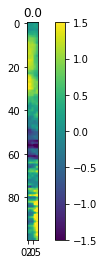

date:180409, rec:005, time:5711.0


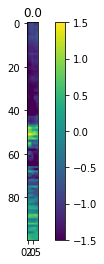

date:180325, rec:007, time:5565.0


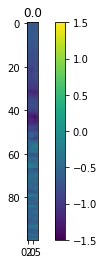

date:180324, rec:008, time:5951.0


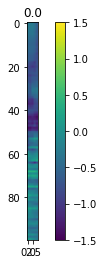

date:180409, rec:006, time:6850.0


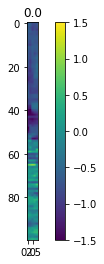

date:180413, rec:001, time:5969.0


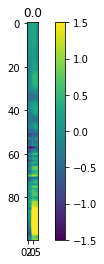

date:180324, rec:008, time:1913.0


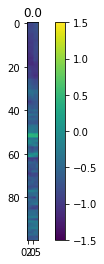

date:180324, rec:006, time:7095.0


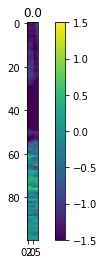

date:180323, rec:007, time:2777.0


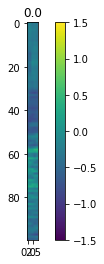

date:180323, rec:007, time:4348.0


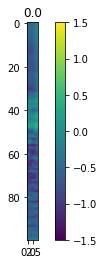

date:180327, rec:001, time:882.0


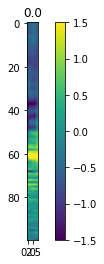

date:180325, rec:009, time:862.0


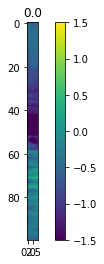

date:180324, rec:008, time:5441.0


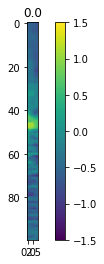

date:180413, rec:002, time:6638.0


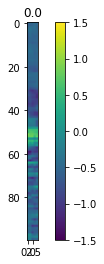

date:180323, rec:004, time:6213.0


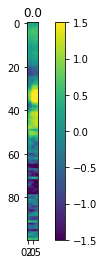

date:180327, rec:005, time:2225.0


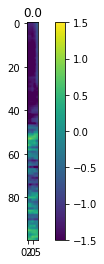

date:180412, rec:006, time:5490.0


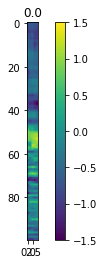

date:180412, rec:005, time:2062.0


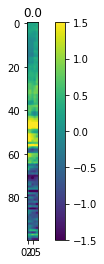

date:180412, rec:001, time:942.0


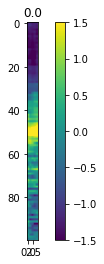

date:180414, rec:002, time:4678.0


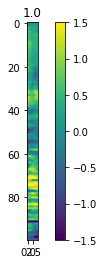

date:180414, rec:001, time:1632.0


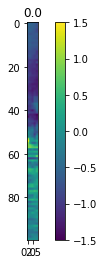

date:180410, rec:003, time:2352.0


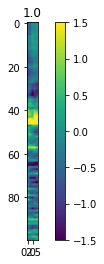

date:180410, rec:005, time:1800.0


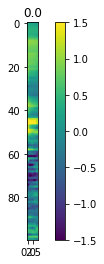

date:180323, rec:007, time:6733.0


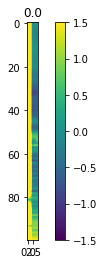

date:180325, rec:001, time:1302.0


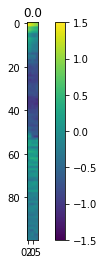

date:180413, rec:002, time:5578.0


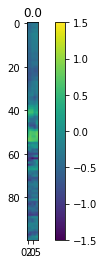

date:180414, rec:001, time:272.0


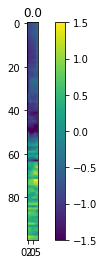

date:180325, rec:001, time:2332.0


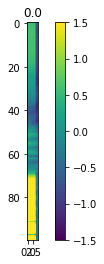

date:180401, rec:001, time:782.0


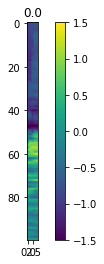

date:180412, rec:005, time:2202.0


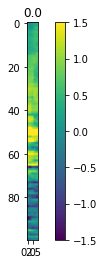

date:180411, rec:002, time:4447.0


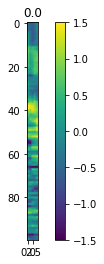

date:180413, rec:002, time:1457.0


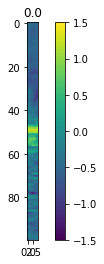

date:180325, rec:009, time:1077.0


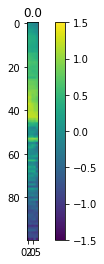

date:180413, rec:001, time:3635.0


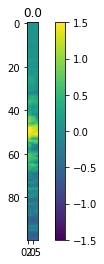

date:180413, rec:002, time:5273.0


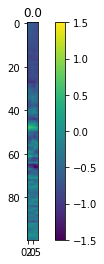

date:180409, rec:006, time:6245.0


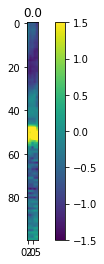

date:180325, rec:009, time:102.0


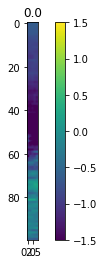

date:180414, rec:007, time:3994.0


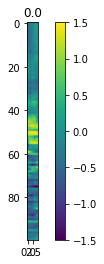

date:180327, rec:001, time:2092.0


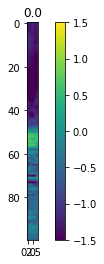

date:180411, rec:007, time:2156.0


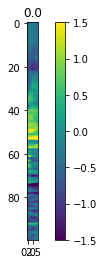

date:180412, rec:005, time:1992.0


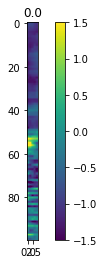

date:180322, rec:007, time:4382.0


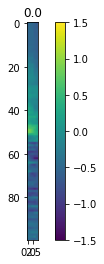

date:180327, rec:007, time:3717.0


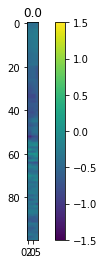

date:180413, rec:001, time:2167.0


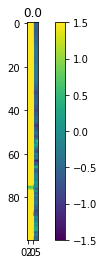

date:180414, rec:001, time:727.0


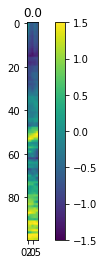

date:180324, rec:003, time:3906.0


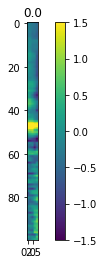

date:180411, rec:006, time:5644.0


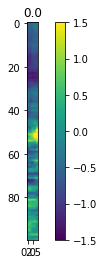

date:180327, rec:001, time:1922.0


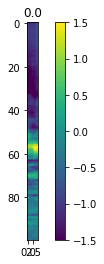

date:180410, rec:006, time:5699.0


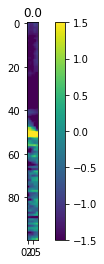

date:180413, rec:003, time:6413.0


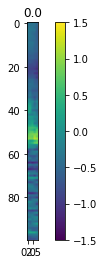

date:180326, rec:004, time:6752.0


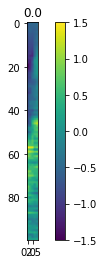

date:180327, rec:001, time:2322.0


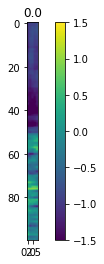

date:180413, rec:001, time:2282.0


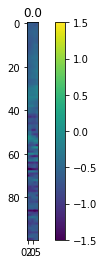

date:180410, rec:006, time:5529.0


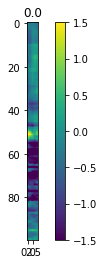

date:180324, rec:005, time:3466.0


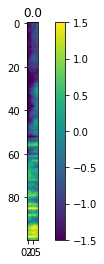

date:180325, rec:007, time:4065.0


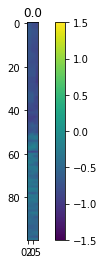

date:180401, rec:001, time:1217.0


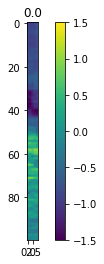

date:180412, rec:006, time:5575.0


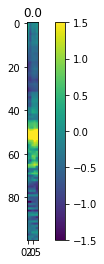

date:180413, rec:003, time:592.0


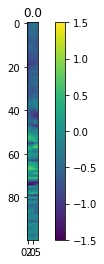

date:180409, rec:006, time:5790.0


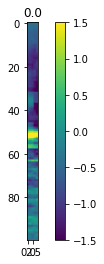

date:180327, rec:005, time:2100.0


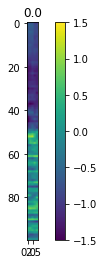

date:180414, rec:001, time:632.0


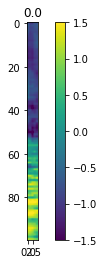

date:180327, rec:005, time:5505.0


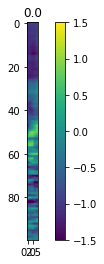

date:180413, rec:003, time:162.0


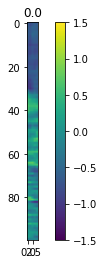

date:180413, rec:001, time:4884.0


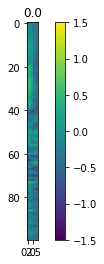

date:180411, rec:006, time:5769.0


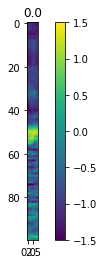

date:180322, rec:007, time:4412.0


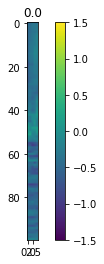

date:180413, rec:003, time:5255.0


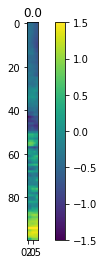

date:180327, rec:001, time:2187.0


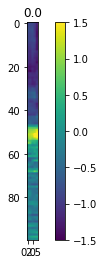

date:180325, rec:001, time:6127.0


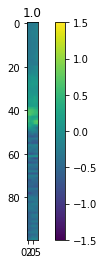

date:180327, rec:001, time:1617.0


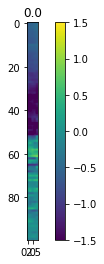

date:180413, rec:004, time:1112.0


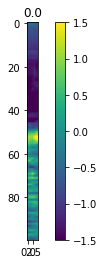

date:180413, rec:002, time:1347.0


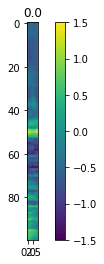

date:180409, rec:006, time:6920.0


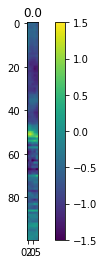

date:180412, rec:001, time:847.0


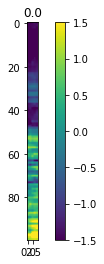

date:180414, rec:007, time:2814.0


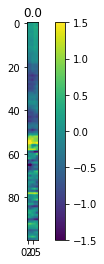

date:180414, rec:001, time:807.0


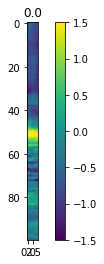

date:180327, rec:008, time:4194.0


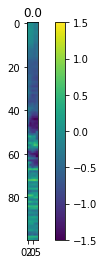

date:180410, rec:006, time:6359.0


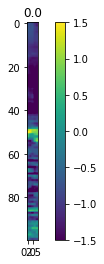

date:180325, rec:007, time:1560.0


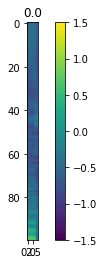

date:180410, rec:006, time:5899.0


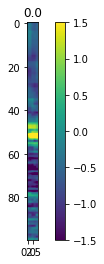

date:180324, rec:008, time:2915.0


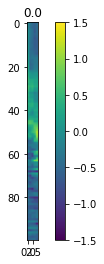

date:180414, rec:007, time:3114.0


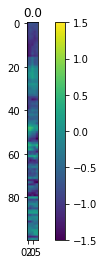

date:180327, rec:008, time:2724.0


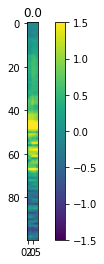

date:180411, rec:007, time:1795.0


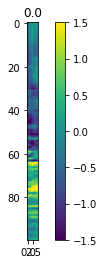

date:180322, rec:007, time:1459.0


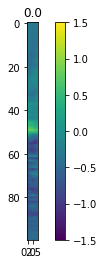

date:180327, rec:001, time:2312.0


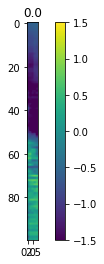

date:180325, rec:007, time:4040.0


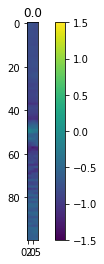

date:180327, rec:007, time:3407.0


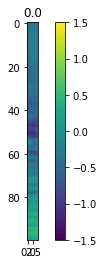

date:180325, rec:007, time:2663.0


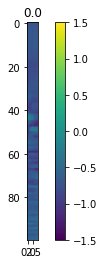

date:180412, rec:001, time:3630.0


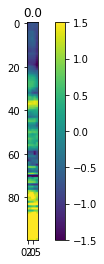

date:180414, rec:007, time:2094.0


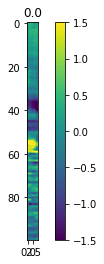

date:180327, rec:007, time:7153.0


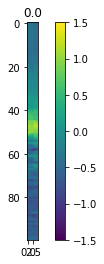

date:180327, rec:008, time:452.0


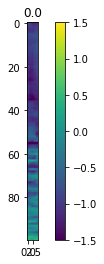

date:180324, rec:008, time:6171.0


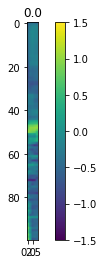

date:180414, rec:001, time:117.0


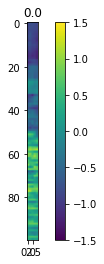

date:180410, rec:006, time:2769.0


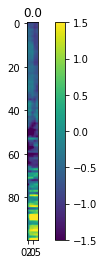

date:180325, rec:002, time:4036.0


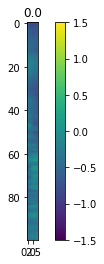

date:180401, rec:002, time:3753.0


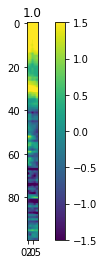

date:180413, rec:003, time:6663.0


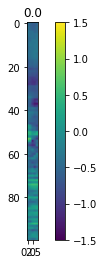

date:180413, rec:003, time:6968.0


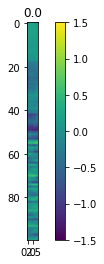

date:180414, rec:001, time:37.0


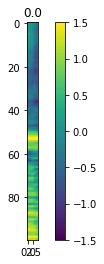

date:180413, rec:002, time:4663.0


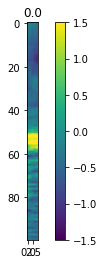

date:180401, rec:001, time:902.0


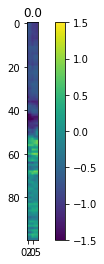

date:180412, rec:005, time:1967.0


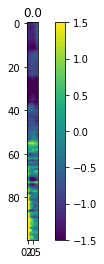

date:180413, rec:002, time:192.0


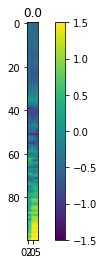

date:180414, rec:001, time:6115.0


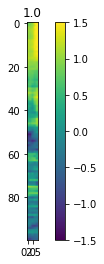

date:180409, rec:003, time:1208.0


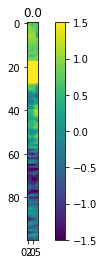

date:180324, rec:008, time:5196.0


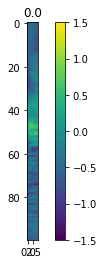

date:180412, rec:006, time:4145.0


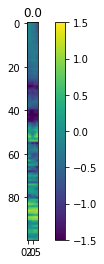

date:180325, rec:009, time:6482.0


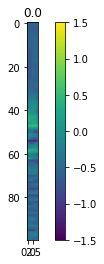

date:180326, rec:003, time:4663.0


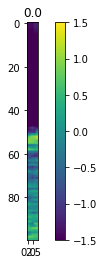

date:180414, rec:007, time:3844.0


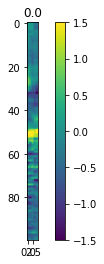

date:180414, rec:007, time:3384.0


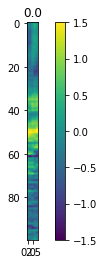

date:180327, rec:005, time:2075.0


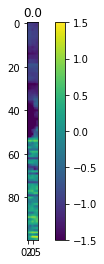

date:180413, rec:003, time:292.0


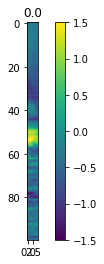

date:180413, rec:002, time:4283.0


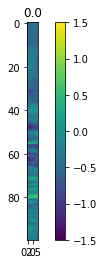

date:180327, rec:007, time:5148.0


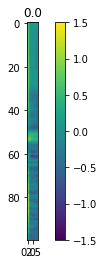

date:180325, rec:001, time:5434.0


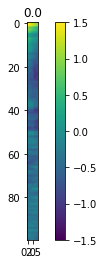

date:180327, rec:007, time:5398.0


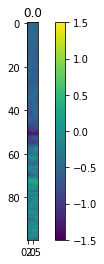

date:180413, rec:002, time:312.0


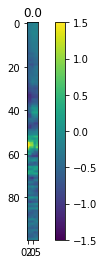

date:180414, rec:007, time:1954.0


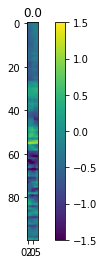

date:180323, rec:003, time:4229.0


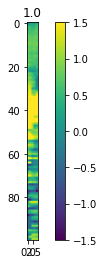

date:180413, rec:002, time:1832.0


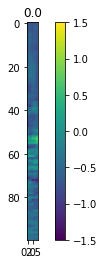

In [5]:
# movement labelled 0; non-movement labelled 1
for batch_idx, (data, label, date, rec, time) in enumerate(train_loader):
    for i in range(128):
        print('date:{}, rec:{}, time:{}'.format(date[i], rec[i], time[i]))
        data_sub = data[i][0]
        plt.imshow(data_sub)
        plt.clim(-1.5, 1.5)
        plt.colorbar()
        plt.title(label[i][0].numpy())
        plt.show()
    break

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

cuda


In [9]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

RuntimeError: mat1 dim 1 must match mat2 dim 0

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

In [8]:
model = LogReg().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch1.pt'.format(path, CH, l2, alpha)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample/lr_CHall_reg0_alpha0_epoch1.pt'

In [ ]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_0 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

In [ ]:
np.mean(np.concatenate(test_labels))

In [ ]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [ ]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_0[0][0], cases_wrong_0[0][1], cases_wrong_0[0][1], cases_wrong_0[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_0[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0.1
alpha = 0
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, weight_decay=l2)

In [ ]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

In [ ]:
model = LogReg().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch11.pt'.format(path, CH, l2, alpha)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [ ]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_1 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

In [ ]:
np.mean(np.concatenate(test_labels))

In [ ]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [ ]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_1[0][0], cases_wrong_1[0][1], cases_wrong_1[0][1], cases_wrong_1[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_1[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

tol = 0.01
learning_rate = 0.001
num_epochs = 51
l2 = 0
alpha = 0.1
CH = 'all'

model = LogReg().to(device)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

In [ ]:
epochs = []
training_losses = []
training_acc = []
val_losses = []
validation_acc = []

train_predictions = []
validation_predictions = []
train_preds_probs = []
validation_preds_probs = []
train_labels = []
validation_labels = []

for epoch in range(num_epochs):
    avg_train_loss, train_acc, train_preds, train_preds_probs, train_labs = train(model, criterion, optimizer, train_loader, epoch, alpha=alpha)
    print('Train loss for epoch {}: {}'.format(epoch, avg_train_loss))
    val_loss, val_acc, val_preds, val_preds_probs, val_labels = test(model, criterion, optimizer, val_loader)
    print('Val loss for epoch {}: {}'.format(epoch, val_loss))
    if val_losses:
        if val_loss < min(val_losses):
            print(epoch)
            path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
            torch.save(model.state_dict(), '{}/lr_CH{}_reg{}_alpha{}_epoch{}.pt'.format(path, CH, l2, alpha, epoch))
    epochs.append(epoch)
    training_losses.append(avg_train_loss)
    training_acc.append(train_acc)
    val_losses.append(val_loss)
    validation_acc.append(val_acc)
    
    train_predictions.append(train_preds)
    train_labels.append(train_labs)
    train_preds_probs.append(train_preds_probs)
    validation_predictions.append(val_preds)
    validation_labels.append(val_labels)
    validation_preds_probs.append(val_preds_probs)
    
    if avg_train_loss < tol:
        break

In [ ]:
plt.figure(figsize=(12,4)) # upsample
plt.subplot(1,2,1)
plt.title("LR", fontsize = 15)
plt.plot(training_losses[:51],linewidth = 1.5,label = 'train')
plt.plot(val_losses[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Loss", fontsize = 15)
plt.legend()
plt.subplot(1,2,2)
plt.title("LR", fontsize = 15)
plt.plot(training_acc[:51],linewidth = 1.5,label = 'train')
plt.plot(validation_acc[:51],linewidth = 1.5,label = 'valid')
plt.xlabel("Epoch",fontsize = 15)
plt.ylabel("Accuracy", fontsize = 15)
plt.legend()
plt.show()

In [ ]:
model = LogReg().to(device)
path = '/mnt/pesaranlab/People/Capstone_students/Yue/model/model_Goose_1st_1_upsample'
model.load_state_dict(torch.load('{}/lr_CH{}_reg{}_alpha{}_epoch27.pt'.format(path, CH, l2, alpha)))
weights = model.linear.weight.view(62, 100, 10)
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = weights[i].detach().cpu()
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    plt.title(str(i+1))
    # plt.clim(-0.03, 0.03)
plt.show()

In [ ]:
test_loss, test_acc, test_preds, test_preds_probs, test_labels, cases_wrong_2 = test(model, criterion, optimizer, test_loader, mode='test')
print('test loss:{} accuracy:{}'.format(test_loss, test_acc))

In [ ]:
np.mean(np.concatenate(test_labels))

In [ ]:
predictions_test = np.concatenate(test_preds)
labels_test = np.concatenate(test_labels)

df_test = pd.DataFrame({'predictions': predictions_test, 'labels': labels_test})

cm_test = confusion_matrix(labels_test, predictions_test)
ax = plt.axes()
sn.heatmap(cm_test, annot = True, fmt = "d", ax = ax, center=3000)
ax.set_title('Test Confusion Matrix')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
plt.show()

In [ ]:
idx = 0
print('date:{}, rec:{}, time:{}, label:{}'.format(cases_wrong_2[0][0], cases_wrong_2[0][1], cases_wrong_2[0][1], cases_wrong_2[0][3]))
print('Original data 62 CH')
plt.figure(figsize=(15,8))
for i in range(62):
    weights_sub = cases_wrong_2[0][-1][i]
    plt.subplot(2,31,i+1)
    plt.axis('off')
    plt.imshow(weights_sub)
    # plt.clim(-0.03, 0.03)
plt.show()